<a href="https://colab.research.google.com/github/AminTurmudiYusup/task_one_ml/blob/master/task_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

uploaded = files.upload()

Saving Customer Purchasing Behaviors.csv to Customer Purchasing Behaviors (1).csv


In [51]:
df=pd.read_csv('Customer Purchasing Behaviors.csv')
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25.0,45000,200,4.5,North,12
1,2,34.0,55000,350,NaN,South,18
2,3,45.0,65000,500,8.0,West,22
3,4,22.0,30000,150,3.0,East,10
4,5,29.0,47000,220,4.8,North,13


**Произвести чистку данных**


In [43]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [44]:
df.fillna(df.median(), inplace=True)

**убрать ненужные признаки**

In [63]:
df = df.drop(['user_id'], axis=1)


**создать новые (Feature Engineering).**

In [60]:
df['income_group'] = pd.cut(df['annual_income'], bins=[0, 30000, 60000, 100000], labels=['Low', 'Medium', 'High'])


**Провести анализ признаков, используя визуализацию**

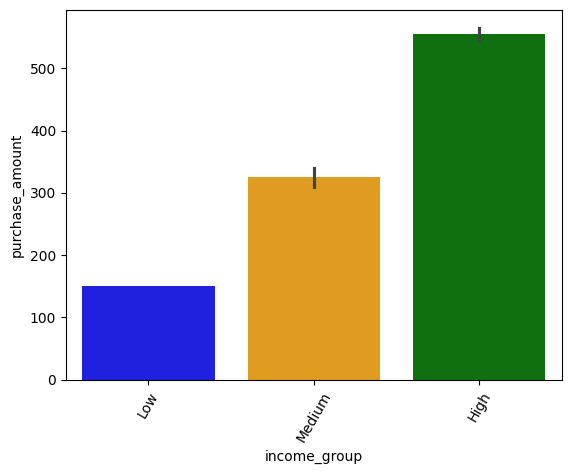

In [62]:
sns.barplot(x="income_group", y="purchase_amount", data=df, palette=["blue", "orange","green"])
plt.xticks(rotation=60)
plt.show()


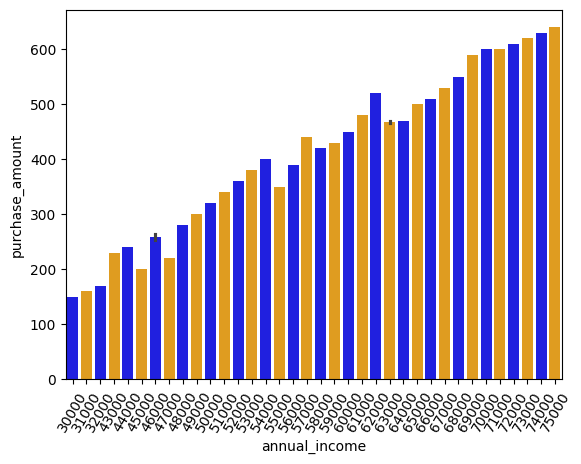

In [45]:
sns.barplot(x="annual_income", y="purchase_amount", data=df, palette=["blue", "orange"])
plt.xticks(rotation=60)
plt.show()


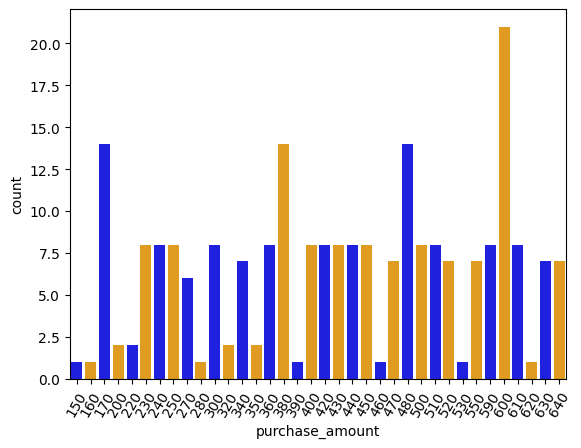

In [46]:
sns.countplot(x='purchase_amount', data=df, palette=["blue", "orange"]);
plt.xticks(rotation=60)
plt.show()

In [52]:
print(df['region'].isnull().sum())


0


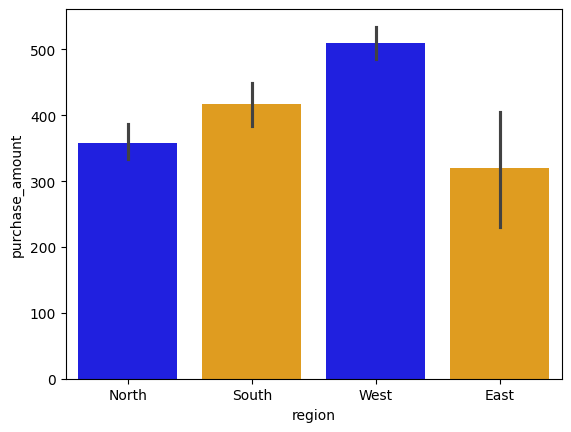

In [53]:
sns.barplot(x="region", y="purchase_amount", data=df, palette=["blue", "orange"])
plt.show()

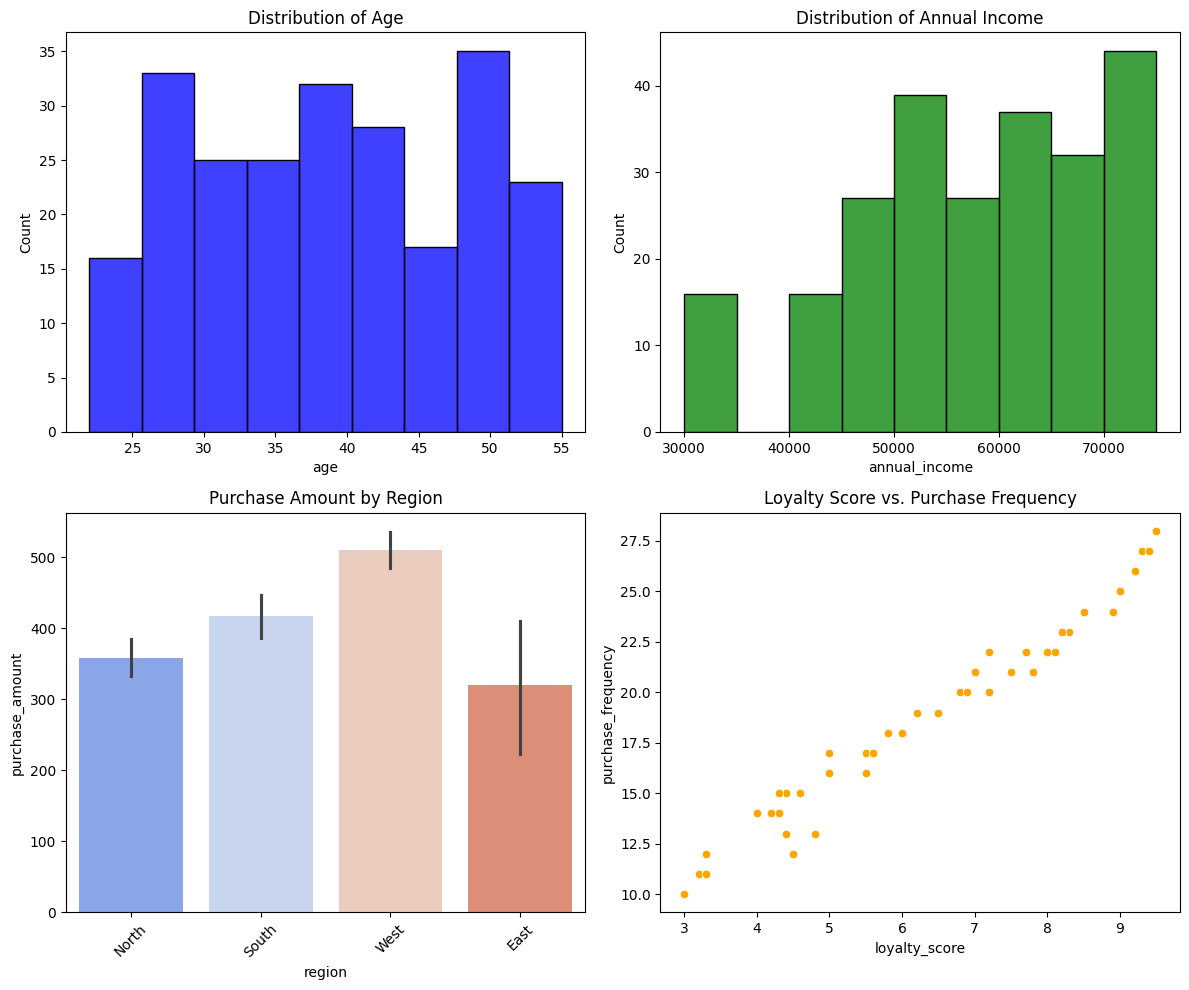

In [54]:
# Define the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots

# Subplot 1: Distribution of Age
sns.histplot(df['age'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Age')

# Subplot 2: Distribution of Annual Income
sns.histplot(df['annual_income'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Annual Income')

# Subplot 3: Purchase Amount by Region (Barplot)
sns.barplot(x='region', y='purchase_amount', data=df, ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title('Purchase Amount by Region')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Subplot 4: Loyalty Score vs. Purchase Frequency (Scatterplot)
sns.scatterplot(x='loyalty_score', y='purchase_frequency', data=df, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Loyalty Score vs. Purchase Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


**Оценить зависимость между признаками **

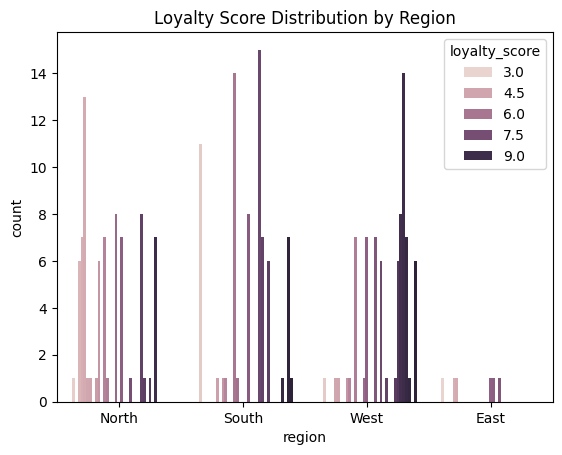

In [56]:
sns.countplot(x='region', hue='loyalty_score', data=df)
plt.title('Loyalty Score Distribution by Region')
plt.show()


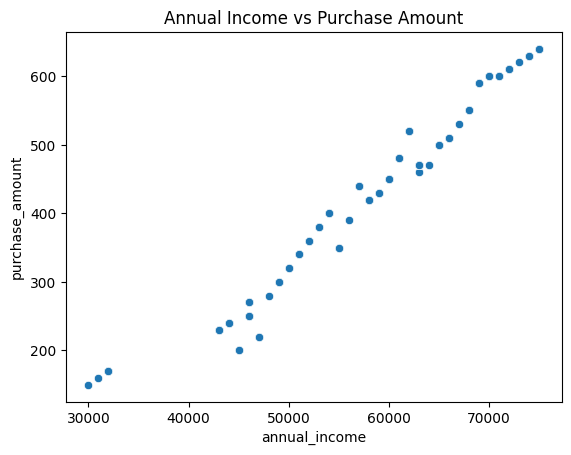

In [57]:
sns.scatterplot(x='annual_income', y='purchase_amount', data=df)
plt.title('Annual Income vs Purchase Amount')
plt.show()


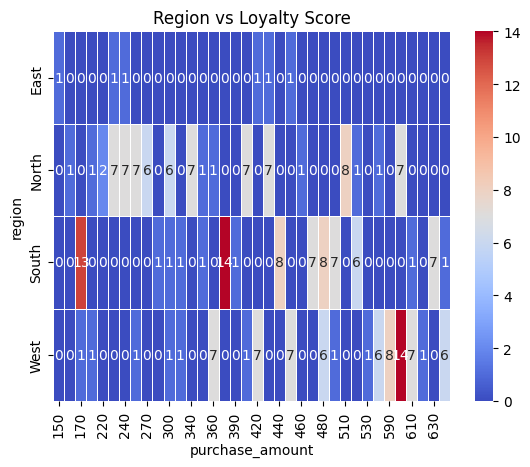

In [59]:
crosstab = pd.crosstab(df['region'], df['purchase_amount'])
sns.heatmap(crosstab, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Region vs Loyalty Score')
plt.show()
